# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [42]:
import pandas as pd

import numpy as np


import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv', sep=',')

### Step 3. Assign it to a variable apple

In [3]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 4.  Check out the type of the columns

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [7]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


In [8]:
apple.duplicated('Date')

0       False
1       False
2       False
3       False
4       False
        ...  
8460    False
8461    False
8462    False
8463    False
8464    False
Length: 8465, dtype: bool

### Step 6.  Set the date as the index

In [9]:
apple = apple.set_index('Date')

In [10]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [14]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [18]:
apple.sort_index(ascending=True,inplace=True)

apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [31]:
#You can generate a time series with the last business day of each month 
# by passing in freq='BM'

apple.resample('M').last()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-31,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-28,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-31,637.98,644.17,628.90,633.00,141005200,90.43


In [28]:
# Series.dt.is_month_end attribute return a boolean value Indicating 

# whether the date is the last day of the month. 

# +Here some instances are missing(every month) where the actual end of the month is during the weekend

apple[apple.index.is_month_end]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
1981-06-30,26.13,26.13,26.00,26.00,8976800,0.41
1981-07-31,25.00,25.12,25.00,25.00,2738400,0.39
...,...,...,...,...,...,...
2014-01-31,495.18,501.53,493.55,500.60,116199300,70.69
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25


### Step 10.  What is the difference in days between the first day and the oldest

In [34]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [40]:
apple.resample('M').count()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,13,13,13,13,13,13
1981-01-31,21,21,21,21,21,21
1981-02-28,19,19,19,19,19,19
1981-03-31,22,22,22,22,22,22
1981-04-30,21,21,21,21,21,21
...,...,...,...,...,...,...
2014-03-31,21,21,21,21,21,21
2014-04-30,21,21,21,21,21,21
2014-05-31,21,21,21,21,21,21


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<AxesSubplot:xlabel='Date'>

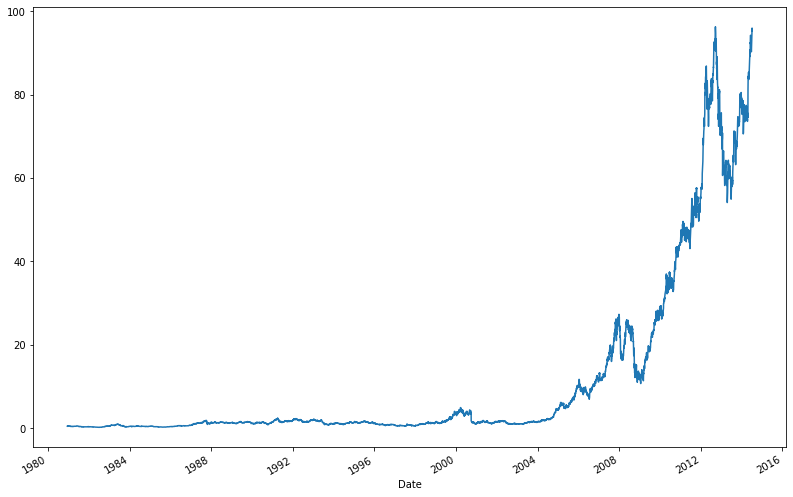

In [63]:
apple['Adj Close'].plot(figsize=(13.5, 9))

<AxesSubplot:ylabel='Frequency'>

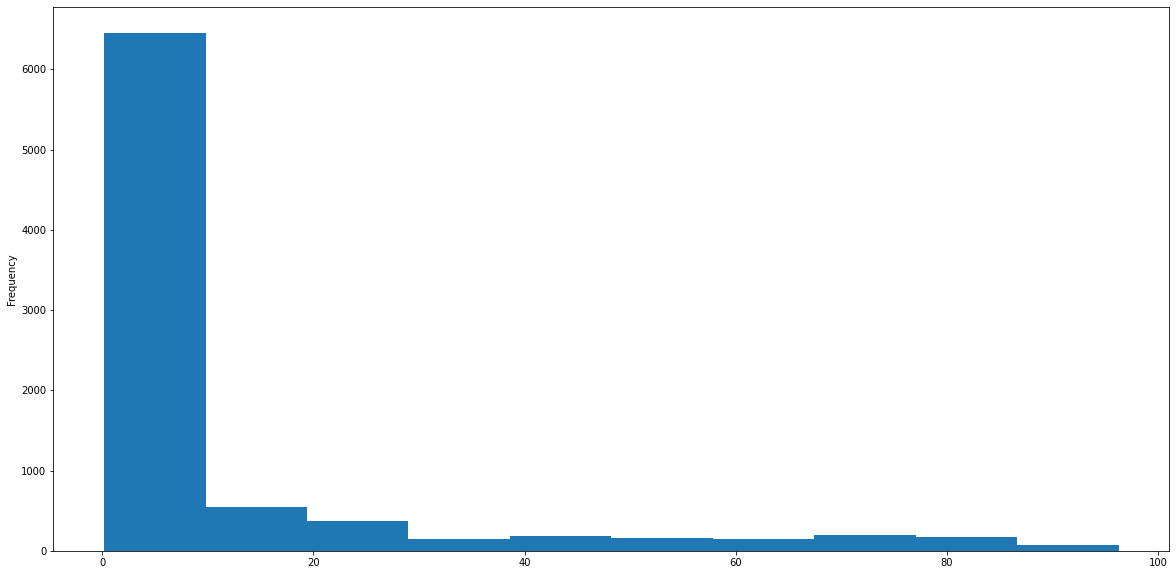

In [64]:
apple['Adj Close'].plot(kind='hist', figsize=(20, 10))


# median_column.plot(kind="hist")

In [62]:
# kind ='scatter' wont work here as we need two columns of a dataset to show their correlation



### BONUS: Create your own question and answer it.